Latest notebook for creating P1 plots using updated data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from hrs_23_figures import *

from sklearn import metrics
from sklearn.preprocessing import StandardScaler


regions=['global', 'roof', 'sept', 'lat', 'ant', 'post']

In [19]:
# DataPath
DataPath = "/media/cs1623/One Touch/Backup_April2023/Dropbox/phd/Data/RG_CT_Cases"
DataPath

'/media/cs1623/One Touch/Backup_April2023/Dropbox/phd/Data/RG_CT_Cases'

In [20]:
# DataPath='/home/csi20local/Dropbox/phd/Data/RG_CT_Cases'

In [21]:
len(nonaf_cases)

21

In [22]:
len(af_cases)

9

In [23]:
path="/home/csi20/Dropbox/phd/Data/kiru_demographics_df_omitAFimaging_linearStrain.csv"

In [24]:
cases_df = pd.read_csv(path)

cases_df.head()

,Case,Age,Sex,NYHA class,Device present?,AF,pre ECG rhythm,Pacing changes for CT,Pacing,Most recent pacing check prior to CT,...,f1_sept_vxm_linear,f1_lat_linear,f2_lat_linear,f1_lat_vxm_linear,f1_ant_linear,f2_ant_linear,f1_ant_vxm_linear,f1_post_linear,f2_post_linear,f1_post_vxm_linear
0,CT-CRT/case01,83,M,2,Dual PPM,paroxysmal,RV paced,No changes,RVP,"Ap 69%, Vp 100%, AF burden 4.9%",...,8.812506,8.115237,16.334287,12.709009,4.894997,5.107904,5.390499,4.398445,10.779804,4.528798
1,CT-CRT/case02,67,M,3,CRT-D,-,BiV with LBBB,Adaptive CRT setting turned on,AsBiVp,-,...,4.311371,11.847472,20.536780,12.408527,11.926033,10.558032,15.761153,5.780665,14.371950,7.914296
2,CT-CRT/case05,79,F,3,Dual PPM,-,"SR, 1st AVB",No changes,RVP,"Ap 95.4%, Vp 88.2%",...,34.356836,25.349602,46.907586,33.062606,27.005228,22.560441,19.575266,25.813103,45.268802,27.083552
3,CT-CRT/case06,50,M,3,Dual PPM,-,LBBB,No changes,RVP,-,...,22.216548,26.109833,28.576547,25.646149,27.359347,29.601047,18.295792,13.262588,19.269164,11.852212
4,CT-CRT/case07,63,M,3,CRT-D,-,BiV pacing,No changes,AsBiVp,"Ap<1%, Vp<1%",...,33.074927,40.662166,30.649022,35.934439,32.634935,22.978319,12.372482,26.506252,27.191551,20.152082


In [25]:
af_df = cases_df[cases_df['af_num'] == 1]
naf_df = cases_df[cases_df['af_num'] == 0]

In [26]:
af_df['Case']

0     CT-CRT/case01
13    CT-CRT/case19
14    CT-CRT/case20
15    CT-CRT/case21
16    CT-CRT/case23
18    CT-CRT/case26
19    CT-CRT/case27
25       EBR/case01
26       EBR/case02
Name: Case, dtype: object

In [27]:
af_cases

['CT-CRT/case01',
 'CT-CRT/case19',
 'CT-CRT/case20',
 'CT-CRT/case23',
 'CT-CRT/case26',
 'CT-CRT/case27',
 'CT-CRT/case31',
 'EBR/case01',
 'EBR/case02']

In [28]:
# # Define a function to calculate the new column values based on another column
# def calc_linear_strain(entry):
#     # Perform calculations based on the entry and return the result
#     entry=entry/100.
    
#     ans = np.sqrt(2*entry+1)-1
    
#     ans=ans*100.
    
#     return ans

In [29]:
cases_df.columns

Index(['Case', 'Age', 'Sex', 'NYHA class', 'Device present?', 'AF',
       'pre ECG rhythm', 'Pacing changes for CT', 'Pacing',
       'Most recent pacing check prior to CT', 'CT heart rhythm', 'MS QRSd',
       'AL QRSd', 'Comments', 'CT date', 'Heart rate', 'LA strain',
       'LA volume', 'LA size', 'LA emptying fraction', 'LA pressure',
       'LV ES volume', 'LVES diameter (cm)', 'LVEF', 'MR/severity', 'HF meds',
       'Previous ablation', 'Prior mitral procedures', 'af_num', 'area_global',
       'area_roof', 'area_sept', 'area_lat', 'area_ant', 'area_post',
       'area_global_mshqual', 'area_roof_mshqual', 'area_sept_mshqual',
       'area_lat_mshqual', 'area_ant_mshqual', 'area_post_mshqual',
       'f1_global', 'f1_roof', 'f1_sept', 'f1_lat', 'f1_ant', 'f1_post',
       'f2_global', 'f2_roof', 'f2_sept', 'f2_lat', 'f2_ant', 'f2_post',
       'LA_vol_CT', 'LAEF_CT', 'Sex_num', 'LV_vol_CT', 'LVEF_CT',
       'area_global_vxm', 'area_roof_vxm', 'area_sept_vxm', 'area_lat_vxm',


In [30]:
# # Apply the function to the existing column and assign the results to the new column

# for region in regions:
    
#     cases_df[f'f1_{region}_linear'] = cases_df[f'f1_{region}'].apply(calc_linear_strain)
#     cases_df[f'f2_{region}_linear'] = cases_df[f'f2_{region}'].apply(calc_linear_strain)
#     cases_df[f'f1_{region}_vxm_linear'] = cases_df[f'f1_{region}_vxm'].apply(calc_linear_strain)

# cases_df.to_csv("/home/csi20local/Dropbox/phd/Data/kiru_demographics_df_omitAFimaging_linearStrain.csv", ',', index=False)

## Attempt to read in 2D LA Strain

In [31]:
DataPath

'/media/cs1623/One Touch/Backup_April2023/Dropbox/phd/Data/RG_CT_Cases'

In [32]:
cases_df.shape[0]

30

In [33]:
mean_2d_strain=np.zeros((cases_df.shape[0],))

for i, case in enumerate(cases_df['Case']):
    
    ch4_path=f"{DataPath}/{case}/MT-2D/4CH/4chamber_reservoir_strain.txt"
    ch4_strain=np.loadtxt(ch4_path)
    
    ch2_path=f"{DataPath}/{case}/MT-2D/2CH/4chamber_reservoir_strain-clip.txt"
    ch2_strain=np.loadtxt(ch2_path)
    
    mean = np.mean([ch4_strain, ch2_strain])
    
#     print(mean)
    
    mean_2d_strain[i]=mean

In [34]:
cases_df['2D_GLS']=mean_2d_strain

In [35]:
cases_df.shape

(30, 89)

In [36]:
af_df = cases_df[cases_df['af_num'] == 1]
naf_df = cases_df[cases_df['af_num'] == 0]

In [37]:
cases_df['2D_GLS']

0     11.949745
1      8.448760
2     23.872000
3     19.867150
4     19.781150
5     11.821100
6      9.512955
7     21.651150
8     16.675550
9      6.107745
10    15.694550
11    20.840150
12    18.696000
13     5.939590
14     5.573385
15          NaN
16     9.790175
17    23.511700
18     5.624975
19     7.084965
20    14.158950
21    12.826100
22    16.075400
23    25.828400
24     4.185950
25     7.751045
26     7.050685
27    45.761500
28    10.961400
29    44.899350
Name: 2D_GLS, dtype: float64

## Boxplot Figure

(0.0, 80.0)

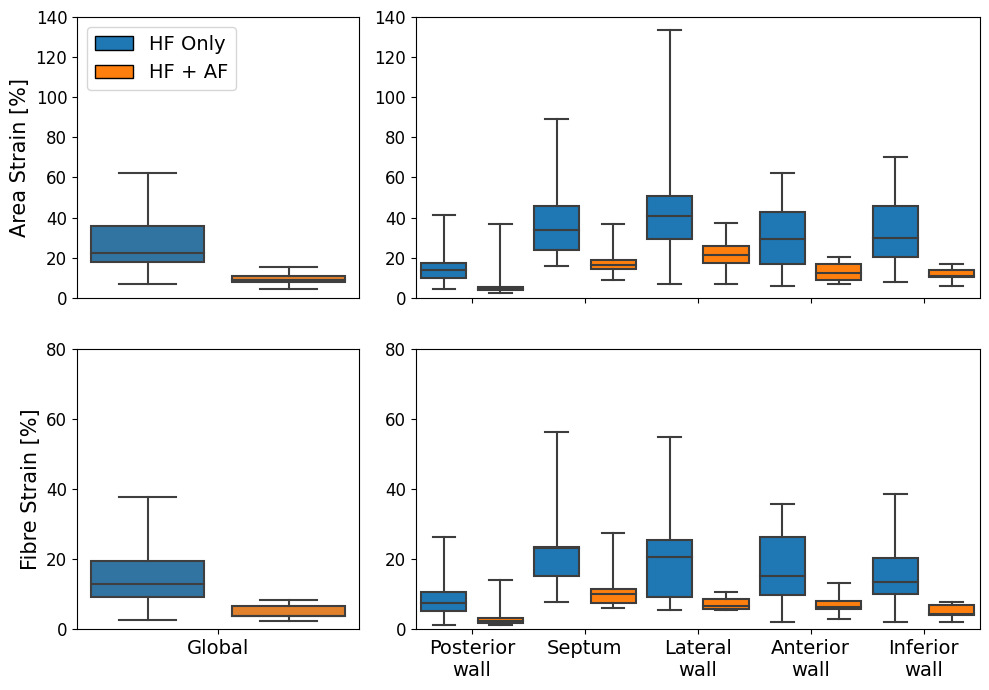

In [38]:
## Combining plots: FIG 2

fig, ((ax1, ax2),
      (ax3, ax4)) = plt.subplots(2,2,figsize=(10,7), facecolor='white', gridspec_kw={'width_ratios': [1, 2]})

ax1_data = [naf_df['area_global'], af_df['area_global']]

ax2_data = [naf_df['area_roof'], af_df['area_roof'],
               naf_df['area_sept'], af_df['area_sept'],
               naf_df['area_lat'], af_df['area_lat'],
               naf_df['area_ant'], af_df['area_ant'],
               naf_df['area_post'], af_df['area_post']]

ax3_data = [naf_df['f1_global'], af_df['f1_global']]

ax4_data = [naf_df['f1_roof_linear'], af_df['f1_roof_linear'],
               naf_df['f1_sept_linear'], af_df['f1_sept_linear'],
               naf_df['f1_lat_linear'], af_df['f1_lat_linear'],
               naf_df['f1_ant_linear'], af_df['f1_ant_linear'],
               naf_df['f1_post_linear'], af_df['f1_post_linear']]

sns.boxplot(data=ax1_data, orient='v', ax=ax1, whis=(0, 100))
sns.boxplot(data=ax2_data, orient='v', ax=ax2, whis=(0, 100))
sns.boxplot(data=ax3_data, orient='v', ax=ax3, whis=(0, 100))
sns.boxplot(data=ax4_data, orient='v', ax=ax4, whis=(0, 100))
# sns.boxplot(data=ax5_data, orient='v', ax=ax5, whis=(0, 100))
# sns.boxplot(data=ax6_data, orient='v', ax=ax6, whis=(0, 100))

regions_axis=['Posterior\nwall', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Inferior\nwall']

ax1.set_ylabel("Area Strain [%]", fontsize=15)
ax3.set_ylabel("Fibre Strain [%]", fontsize=15)
# ax5.set_ylabel("Cross-Fibre Strain [%]", fontsize=15)

ax3.set_xticks(ticks=np.arange(0.5,1.5,1))
ax3.set_xticklabels(["Global"], fontsize=16)

ax2.set_xticks(ticks=np.arange(0.5,9.5,2))

ax4.set_xticks(ticks=np.arange(0.5,9.5,2))
ax4.set_xticklabels(regions_axis, fontsize=16)

for i in range(0, 10, 2):
    mybox = ax2.patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 11, 2):
    mybox = ax2.patches[i]
    mybox.set_facecolor('tab:orange')
    
for i in range(0, 10, 2):
    mybox = ax4.patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 11, 2):
    mybox = ax4.patches[i]
    mybox.set_facecolor('tab:orange')
    
# for i in range(0, 10, 2):
#     mybox = ax6.patches[i]
#     mybox.set_facecolor('tab:blue')

# for i in range(1, 11, 2):
#     mybox = ax6.patches[i]
#     mybox.set_facecolor('tab:orange')

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

for i in range(0, len(fig.axes)):
    fig.axes[i].tick_params(axis='y', labelsize=12)
    
    fig.axes[i].tick_params(axis='x', labelsize=14)
    
    fig.axes[i].set_yticks(ticks=np.arange(0.0,160,20))

plt.tight_layout()

for i in [0]:
    fig.axes[i].xaxis.set_ticks_position('none') 
    fig.axes[i].set_xticklabels([" ", " "])

ax1.set_ylim(0.0, 140)
ax2.set_ylim(0.0, 140)

ax3.set_ylim(0.0, 80)
ax4.set_ylim(0.0, 80)

# ax5.set_ylim(0.0, 100)
# ax6.set_ylim(0.0, 100)
    
# plt.savefig("/home/csi20local/Dropbox/phd/Documents/P1/EHJ_CI/boxplots_v2", dpi=200, bbox_inches="tight")

In [39]:
for i in range(0, len(regions)):
    region=regions[i]

    ans = stats.ttest_ind(naf_df[f'area_{region}'], af_df[f'area_{region}'])
    ans_f1 = stats.ttest_ind(naf_df[f'f1_{region}_linear'], af_df[f'f1_{region}_linear'])

    print(f"{region}\t area: {ans}\n\t f1: {ans_f1}\n")

global	 area: TtestResult(statistic=3.5641563674787107, pvalue=0.001333670405407802, df=28.0)
	 f1: TtestResult(statistic=3.561107769504435, pvalue=0.001344336885985375, df=28.0)

roof	 area: TtestResult(statistic=1.8500267789130436, pvalue=0.07488977389318023, df=28.0)
	 f1: TtestResult(statistic=2.3149371504646212, pvalue=0.028165602955347733, df=28.0)

sept	 area: TtestResult(statistic=2.7098306535274177, pvalue=0.011360142489260093, df=28.0)
	 f1: TtestResult(statistic=2.569410705140168, pvalue=0.015802969280993347, df=28.0)

lat	 area: TtestResult(statistic=2.4080985510498953, pvalue=0.02286787673220155, df=28.0)
	 f1: TtestResult(statistic=2.836456476137985, pvalue=0.0083834621625034, df=28.0)

ant	 area: TtestResult(statistic=3.0756966734312225, pvalue=0.004654075731832623, df=28.0)
	 f1: TtestResult(statistic=3.120823886560979, pvalue=0.004157029081973866, df=28.0)

post	 area: TtestResult(statistic=3.8175674866732563, pvalue=0.0006838403413420076, df=28.0)
	 f1: TtestResult(st

## Noramlised strain FIgure

(-1.0, 5.0)

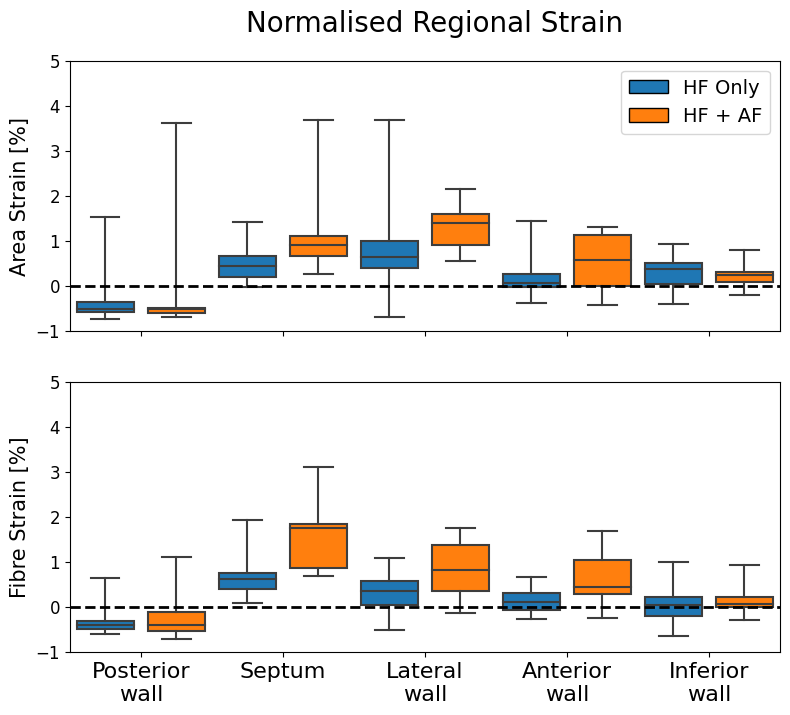

In [40]:
## Combining plots: FIG 2

fig, ((ax1, ax2)) = plt.subplots(2,1,figsize=(8,7), facecolor='white')

ax1_data = [naf_df['area_roof']/naf_df['area_global']-1, af_df['area_roof']/af_df['area_global']-1,
               naf_df['area_sept']/naf_df['area_global']-1, af_df['area_sept']/af_df['area_global']-1,
               naf_df['area_lat']/naf_df['area_global']-1, af_df['area_lat']/af_df['area_global']-1,
               naf_df['area_ant']/naf_df['area_global']-1, af_df['area_ant']/af_df['area_global']-1,
               naf_df['area_post']/naf_df['area_global']-1, af_df['area_post']/af_df['area_global']-1]

ax2_data = [naf_df['f1_roof_linear']/naf_df['f1_global_linear']-1, af_df['f1_roof_linear']/af_df['f1_global_linear']-1,
               naf_df['f1_sept_linear']/naf_df['f1_global_linear']-1, af_df['f1_sept_linear']/af_df['f1_global_linear']-1,
               naf_df['f1_lat_linear']/naf_df['f1_global_linear']-1, af_df['f1_lat_linear']/af_df['f1_global_linear']-1,
               naf_df['f1_ant_linear']/naf_df['f1_global_linear']-1, af_df['f1_ant_linear']/af_df['f1_global_linear']-1,
               naf_df['f1_post_linear']/naf_df['f1_global_linear']-1, af_df['f1_post_linear']/af_df['f1_global_linear']-1]

sns.boxplot(data=ax1_data, orient='v', ax=ax1, whis=(0, 100))
sns.boxplot(data=ax2_data, orient='v', ax=ax2, whis=(0, 100))

ax1.axhline(y=0.0, linestyle='dashed', lw=2, c='black')
ax2.axhline(y=0.0, linestyle='dashed', lw=2, c='black')

regions_axis=['Posterior\nwall', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Inferior\nwall']

ax1.set_ylabel("Area Strain [%]", fontsize=15)
ax2.set_ylabel("Fibre Strain [%]", fontsize=15)

for i in range(0, 10, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 11, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:orange')
    
for i in range(0, 10, 2):
    mybox = ax2.patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 11, 2):
    mybox = ax2.patches[i]
    mybox.set_facecolor('tab:orange')

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF')]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=14)

for i in range(0, len(fig.axes)):
    fig.axes[i].tick_params(axis='y', labelsize=12)    
    fig.axes[i].tick_params(axis='x', labelsize=14)
    
    fig.axes[i].set_yticks(ticks=np.arange(-1.0,6,1))

plt.suptitle("Normalised Regional Strain", fontsize=20, x=0.55)

plt.tight_layout()

for i in [0, 1]:
#     fig.axes[i].xaxis.set_ticks_position('none') 
    fig.axes[i].set_xticklabels([" "]*10)

ax1.set_xticks(ticks=np.arange(0.5,9.5,2))    
ax2.set_xticks(ticks=np.arange(0.5,9.5,2))
ax2.set_xticklabels(regions_axis, fontsize=16)

ax1.set_ylim(-1.0, 5)
ax2.set_ylim(-1.0, 5)
    
# plt.savefig("/home/csi20local/Dropbox/phd/Documents/P1/EHJ_CI/normalised_boxplots_v2", dpi=200, bbox_inches="tight")

In [41]:
for i in range(1, len(regions)):
    region = regions[i]
    
    ans_a = stats.ttest_ind(naf_df[f'area_{region}']/naf_df[f'area_global'], af_df[f'area_{region}']/af_df[f'area_global'])
    ans_f1 = stats.ttest_ind(naf_df[f'f1_{region}_linear']/naf_df[f'f1_global_linear'], af_df[f'f1_{region}_linear']/af_df[f'f1_global_linear'])
    
    print(f"{region}\t area: {ans_a}\n\t f1: {ans_f1}\n")

roof	 area: TtestResult(statistic=-0.9757114362514069, pvalue=0.33756244297095717, df=28.0)
	 f1: TtestResult(statistic=-0.9996532470360525, pvalue=0.3260395911366758, df=28.0)

sept	 area: TtestResult(statistic=-2.6374116581526303, pvalue=0.013481034967203072, df=28.0)
	 f1: TtestResult(statistic=-4.453443288319423, pvalue=0.0001233359714761296, df=28.0)

lat	 area: TtestResult(statistic=-1.9240278931690986, pvalue=0.06457024546812892, df=28.0)
	 f1: TtestResult(statistic=-2.627244403041155, pvalue=0.013806751665189418, df=28.0)

ant	 area: TtestResult(statistic=-1.979681411275992, pvalue=0.05764612106118092, df=28.0)
	 f1: TtestResult(statistic=-3.217427171615842, pvalue=0.003258095157336334, df=28.0)

post	 area: TtestResult(statistic=0.47587575472811827, pvalue=0.6378549472120094, df=28.0)
	 f1: TtestResult(statistic=-0.44945511067445393, pvalue=0.6565633772801127, df=28.0)



## AUC Figure 

### Todo: add in LAEF and LA volume for extra EBR cases

In [42]:
naf_df.shape

(21, 89)

In [43]:
cases_df.shape

(30, 89)

In [44]:
regions

['global', 'roof', 'sept', 'lat', 'ant', 'post']

In [45]:
total_cases = cases_df.shape[0]

y_true = np.zeros((total_cases, len(regions)))
y_true[:len(nonaf_cases), :] = 1.0
y_true[len(nonaf_cases):, :] = 0.0

y_fibers = np.zeros((total_cases, len(regions), 2))
y_area = np.zeros((total_cases, len(regions)))
y_lavol = np.zeros((total_cases,))
y_laef = np.zeros((total_cases,))

for i in range(0, len(regions)):
    region = regions[i]
    
    y_fibers[:naf_df.shape[0], i, 0] = naf_df[f'f1_{region}_linear'].to_numpy()
    y_fibers[naf_df.shape[0]:, i, 0] = af_df[f'f1_{region}_linear'].to_numpy()
    
    y_fibers[:naf_df.shape[0], i, 1] = naf_df[f'f2_{region}'].to_numpy()
    y_fibers[naf_df.shape[0]:, i, 1] = af_df[f'f2_{region}'].to_numpy()
    
    y_area[:naf_df.shape[0], i] = naf_df[f'area_{region}'].to_numpy()
    y_area[naf_df.shape[0]:, i] = af_df[f'area_{region}'].to_numpy()
    
y_lavol[:naf_df.shape[0]] = naf_df['LA_vol_CT'].to_numpy()
y_lavol[naf_df.shape[0]:] = af_df['LA_vol_CT'].to_numpy()

y_laef[:naf_df.shape[0]] = naf_df['LAEF_CT'].to_numpy()
y_laef[naf_df.shape[0]:] = af_df['LAEF_CT'].to_numpy()

In [46]:
y_gls = np.zeros((total_cases,))
y_gls[:naf_df.shape[0]] = naf_df['2D_GLS'].to_numpy()
y_gls[naf_df.shape[0]:] = af_df['2D_GLS'].to_numpy()

In [47]:
fpr_f1, tpr_f1, thresholds_f1 = metrics.roc_curve(y_true[:, 0], y_fibers[:, 0, 0])
auc_f1 = metrics.roc_auc_score(y_true[:, 0], y_fibers[:, 0, 0])

fpr_f2, tpr_f2, thresholds_f2 = metrics.roc_curve(y_true[:, 0], y_fibers[:, 0, 1])
auc_f2 = metrics.roc_auc_score(y_true[:, 0], y_fibers[:, 0, 1])

fpr_a, tpr_a, thresholds_a = metrics.roc_curve(y_true[:, 0], y_area[:, 0])
auc_a = metrics.roc_auc_score(y_true[:, 0], y_area[:, 0])

fpr_LAEF, tpr_LAEF, thresholds_LAEF = metrics.roc_curve(y_true[:, 0], y_laef[:])
auc_LAEF = metrics.roc_auc_score(y_true[:, 0], y_laef[:])

fpr_LAvol, tpr_LAvol, thresholds_LAvol = metrics.roc_curve(y_true[:, 0], y_lavol[:])
auc_LAvol = metrics.roc_auc_score(y_true[:, 0], y_lavol[:])
auc_LAvol = 1-auc_LAvol

In [48]:
fpr_GLS, tpr_GLS, thresholds_GLS = metrics.roc_curve(y_true[:, 0], y_gls[:])
auc_GLS = metrics.roc_auc_score(y_true[:, 0], y_gls[:])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [49]:
print("AUC fibres f1: ", auc_f1)
print("AUC fibres f2: ", auc_f2)

print("AUC area: ", auc_a)
print("AUC LAEF: ", auc_LAEF)
print("AUC LAvol: ", auc_LAvol)
print("AUC GLS: ", auc_LAvol)

AUC fibres f1:  0.9365079365079365
AUC fibres f2:  0.9100529100529099
AUC area:  0.9100529100529102
AUC LAEF:  0.8888888888888888
AUC LAvol:  0.8835978835978836
AUC GLS:  0.8835978835978836


Text(0.5, 1.0, 'LAEF & LA volume')

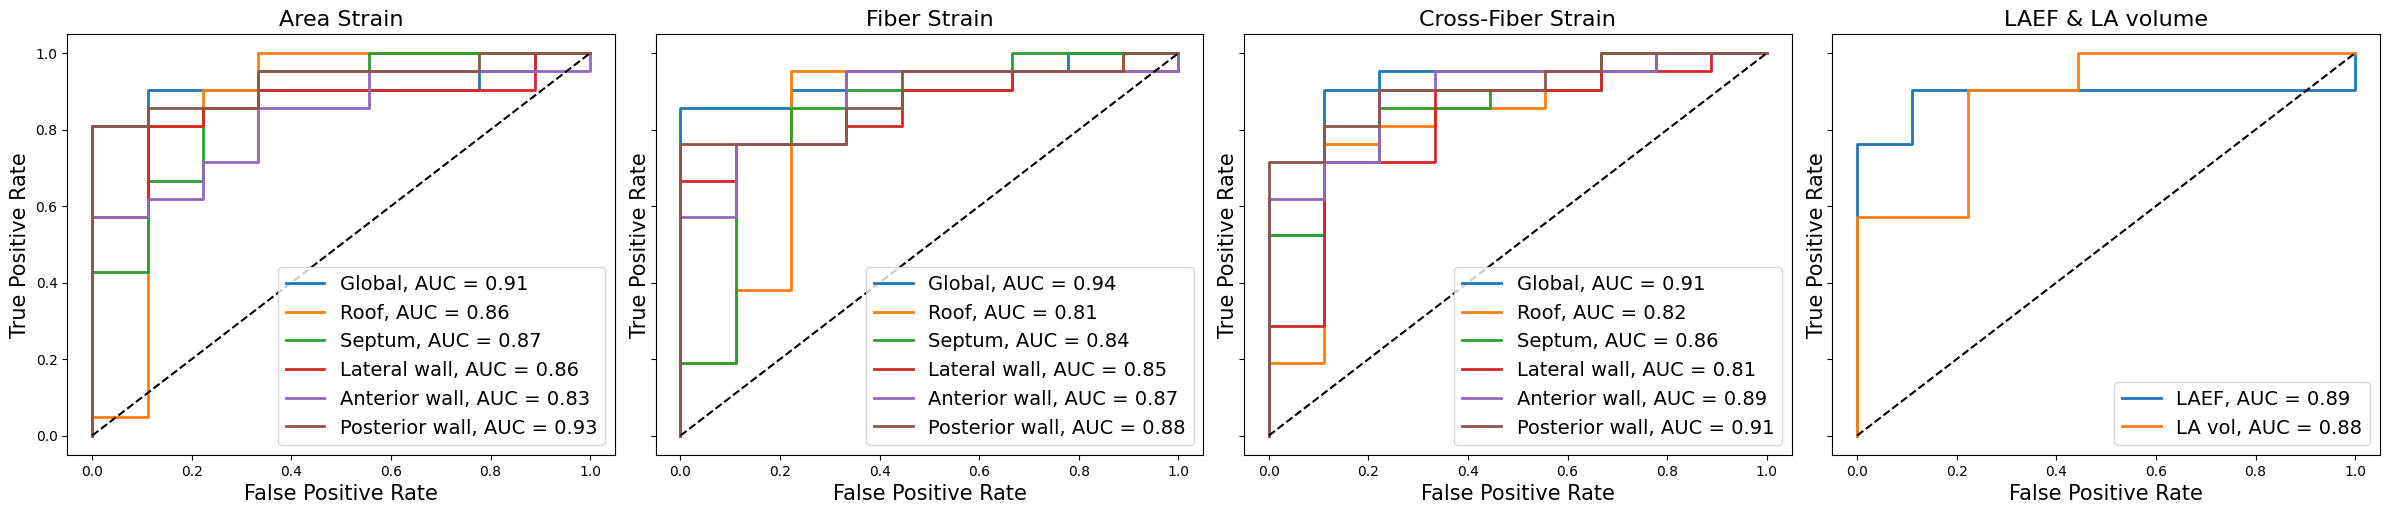

In [50]:
## Plotting all 6 lines on same plot

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4,figsize=(24,5), facecolor='white', sharey=True)

regions_axis=['Global', 'Roof', 'Septum', 'Lateral wall', 'Anterior wall', 'Posterior wall']

for i in range(0, len(regions)):
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true[:, i], y_area[:, i])
    auc = metrics.roc_auc_score(y_true[:, i], y_area[:, i])
    
    ax1.plot(fpr, tpr, label=f"{regions_axis[i]}, AUC = {str(np.round(auc,2))}", lw='2')

for i in range(0, len(regions)):
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true[:, i], y_fibers[:, i, 0])
    auc = metrics.roc_auc_score(y_true[:, i], y_fibers[:, i, 0])
    
    ax2.plot(fpr, tpr, label=f"{regions_axis[i]}, AUC = {str(np.round(auc,2))}", lw='2')
    
for i in range(0, len(regions)):
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true[:, i], y_fibers[:, i, 1])
    auc = metrics.roc_auc_score(y_true[:, i], y_fibers[:, i, 1])
    
    ax3.plot(fpr, tpr, label=f"{regions_axis[i]}, AUC = {str(np.round(auc,2))}", lw='2')

fpr_LAEF, tpr_LAEF, thresholds_LAEF = metrics.roc_curve(y_true[:, 0], y_laef[:])
auc_LAEF = metrics.roc_auc_score(y_true[:, 0], y_laef[:])

fpr_LAvol, tpr_LAvol, thresholds_LAvol = metrics.roc_curve(y_true[:, 0], -y_lavol[:])
auc_LAvol = metrics.roc_auc_score(y_true[:, 0], -y_lavol[:])

ax4.plot(fpr_LAEF, tpr_LAEF, label=f"LAEF, AUC = {str(np.round(auc_LAEF,2))}", lw='2')
ax4.plot(fpr_LAvol, tpr_LAvol, label=f"LA vol, AUC = {str(np.round(auc_LAvol,2))}", lw='2')

for i in range(0, len(fig.axes)):
    fig.axes[i].plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black')
    fig.axes[i].set_xlabel("False Positive Rate", fontsize=15)
    fig.axes[i].set_ylabel("True Positive Rate", fontsize=15)
    fig.axes[i].legend(fontsize=14)
    
plt.tight_layout()

ax1.set_title("Area Strain", fontsize=16)
ax2.set_title("Fiber Strain", fontsize=16)
ax3.set_title("Cross-Fiber Strain", fontsize=16)
ax4.set_title("LAEF & LA volume", fontsize=16)

# plt.text(0.6, 0.5, f'AUC = {str(np.round(auc,3))}', size=15)
# plt.savefig("/home/csi20/Dropbox/phd/Documents/P1/figures/fig3/fig3_2.png", dpi=200, bbox_inches="tight")

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kf = KFold(n_splits=5, shuffle=False)
kf_strat = StratifiedKFold(n_splits=5, shuffle=False)

## Want to use straitifed kfold as want roughly same proportion of AF and nonAF in each fold

## use indices for train and test splits to create pred and true arrays for each fold
## calculate auc for each fold
## calculate roc values for each fold
## use this to calculate mean, std of AUC
## Use this to calculate mean ROC curve coordiantes

In [39]:
all_cases = nonaf_cases + af_cases

af_naf_classes = np.zeros((len(all_cases),))
af_naf_classes[:len(nonaf_cases)] = 0.0
af_naf_classes[len(nonaf_cases):] = 1.0

In [40]:
kf_strat_split = kf_strat.split(all_cases, af_naf_classes)

In [41]:
kf_strat_split_inst = next(kf_strat_split)

training_list = [all_cases[i] for i in kf_strat_split_inst[0]]
val_list = [all_cases[i] for i in kf_strat_split_inst[1]]

In [42]:
y_area.shape

(30, 6)

In [43]:
y_fibers.shape

(30, 6, 2)

In [44]:
from sklearn.metrics import auc


## Populate y_true and y_pred labels using ALL data
y_true = np.zeros((total_cases, 6))
y_true[:len(nonaf_cases), :] = 1.0
y_true[len(nonaf_cases):, :] = 0.0

# y_probs_fibres = np.zeros((total_cases, 6, 2))
# y_probs_fibres[:len(nonaf_cases), :, 0] = nonAF_fibre_ranges[:, :, 0] 
# y_probs_fibres[len(nonaf_cases):, :, 0] = AF_fibre_ranges[:, :, 0]
# y_probs_fibres[:len(nonaf_cases), :, 1] = nonAF_fibre_ranges[:, :, 1] 
# y_probs_fibres[len(nonaf_cases):, :, 1] = AF_fibre_ranges[:, :, 1]

# y_probs_area = np.zeros((total_cases, 6))
# y_probs_area[:len(nonaf_cases), :] = nonAF_area_ranges[:, :] 
# y_probs_area[len(nonaf_cases):, :] = AF_area_ranges[:, :] 

# y_probs_LAEF = np.zeros((total_cases,))
# y_probs_LAEF[:len(nonaf_cases)] = nonAF_LAEF[:] 
# y_probs_LAEF[len(nonaf_cases):] = AF_LAEF[:] 

# y_probs_LAvol = np.zeros((total_cases,))
# y_probs_LAvol[:len(nonaf_cases)] = nonAF_LAvol[:] 
# y_probs_LAvol[len(nonaf_cases):] = AF_LAvol[:] 

In [51]:
## Initialise results arrays

## Shape: K_folds X regions
area_auc = np.zeros((5,6))
fibre_f1_auc = np.zeros((5,6))
fibre_f2_auc = np.zeros((5,6))
LAEF_auc = np.zeros((5,))
LAvol_auc = np.zeros((5,))
GLS_auc = np.zeros((5,))

## Combinations 
LAvol_LAEF_auc = np.zeros((5,))
LAvol_f1_auc = np.zeros((5,6))
LAvol_area_auc = np.zeros((5,6))
LAvol_GLS_auc = np.zeros((5,))

LAvol_LAEF_f1_auc = np.zeros((5,6))
LAvol_LAEF_area_auc = np.zeros((5,6))

## Interpolate TPRs 
## Fold X Interpolated size X Region
tprs_f1 = np.zeros((5, 100, 6))
tprs_f2 = np.zeros((5, 100, 6))
tprs_a = np.zeros((5, 100, 6))

## Fold X Interpolated size
tprs_LAEF = np.zeros((5, 100))
tprs_LAvol = np.zeros((5, 100))
tprs_GLS = np.zeros((5, 100))

mean_fpr = np.linspace(0, 1, 100)

scaler = StandardScaler()

## Combintations
## All combinations involving strains have 6 regions
tprs_LAvol_LAEF = np.zeros((5, 100))
tprs_LAvol_f1 = np.zeros((5, 100, 6))
tprs_LAvol_area = np.zeros((5, 100, 6))
tprs_LAvol_GLS = np.zeros((5, 100))

tprs_LAvol_LAEF_f1 = np.zeros((5, 100, 6))
tprs_LAvol_LAEF_area = np.zeros((5, 100, 6))

In [79]:
for i, (train_index, test_index) in enumerate(kf_strat.split(all_cases, af_naf_classes)):
    print(f"Fold {i}:")
    
    ## Create pred and true arrays for fold
    y_true_fold = np.take(y_true, train_index, axis=0)
    
    y_probs_fibres_fold = np.take(y_fibers, train_index, axis=0) 
    y_area_fold = np.take(y_area, train_index, axis=0)
    y_probs_LAEF_fold = np.take(y_laef, train_index, axis=0)
    y_probs_LAvol_fold = np.take(y_lavol, train_index, axis=0)
    y_probs_GLS_fold = np.take(y_gls, train_index, axis=0)

    ## Scale LAvol, LAEF and GLS
    y_probs_LAvol_fold_scaled = scaler.fit_transform(y_probs_LAvol_fold[:][:, np.newaxis])
    y_probs_LAEF_fold_scaled = scaler.fit_transform(y_probs_LAEF_fold[:][:, np.newaxis])
    y_probs_GLS_fold_scaled = scaler.fit_transform(y_probs_GLS_fold[:][:, np.newaxis])
    
    ## Calculate ROC scores
    
    ## iterate over all regions
    for j in range(0, 6):
        
        ## Fiber strains
        fpr_f1, tpr_f1, thresholds_f1 = metrics.roc_curve(y_true_fold[:, j], y_probs_fibres_fold[:, j, 0])
        auc_f1 = metrics.roc_auc_score(y_true_fold[:, j], y_probs_fibres_fold[:, j, 0])
        fibre_f1_auc[i, j] = auc_f1
        
        ## Interpolate tpr and fpr values
        interp_tpr = np.interp(mean_fpr, fpr_f1, tpr_f1)
        interp_tpr[0] = 0.0
        tprs_f1[i, :, j] = interp_tpr

        ## Cross-fiber strains
        fpr_f2, tpr_f2, thresholds_f2 = metrics.roc_curve(y_true_fold[:, j], y_probs_fibres_fold[:, j, 1])
        auc_f2 = metrics.roc_auc_score(y_true_fold[:, j], y_probs_fibres_fold[:, j, 1])
        fibre_f2_auc[i, j] = auc_f2
        
        ## Interpolate tpr and fpr values
        interp_tpr = np.interp(mean_fpr, fpr_f2, tpr_f2)
        interp_tpr[0] = 0.0
        tprs_f2[i, :, j] = interp_tpr
        
        ## Area strains
        fpr_a, tpr_a, thresholds_a = metrics.roc_curve(y_true_fold[:, j], y_area_fold[:, j])
        auc_a = metrics.roc_auc_score(y_true_fold[:, j], y_area_fold[:, j])
        area_auc[i, j] = auc_a
        
        ## Interpolate tpr and fpr values
        interp_tpr = np.interp(mean_fpr, fpr_a, tpr_a)
        interp_tpr[0] = 0.0
        tprs_a[i, :, j] = interp_tpr
        
        ## Combinations: Strains with LAvol, LAEF
        ## LAvol + fibre strains
        y_probs_fibres_fold_scaled = scaler.fit_transform(y_probs_fibres_fold[:, j, 0][:, np.newaxis])
        y_pred = y_probs_fibres_fold_scaled-y_probs_LAvol_fold_scaled
        
        fpr_LAvol_f1, tpr_LAvol_f1, thresholds_LAvol_f1 = metrics.roc_curve(y_true_fold[:, 0], y_pred[:])
        auc_LAvol_f1 = metrics.roc_auc_score(y_true_fold[:, 0], y_pred[:])
        LAvol_f1_auc[i, j] = auc_LAvol_f1
        
        ## Interpolate
        interp_tpr = np.interp(mean_fpr, fpr_LAvol_f1, tpr_LAvol_f1)
        interp_tpr[0] = 0.0
        tprs_LAvol_f1[i, :, j] = interp_tpr
        
        ## LAvol + LAEF + fibre strains
        y_pred = y_probs_fibres_fold_scaled-y_probs_LAvol_fold_scaled+y_probs_LAEF_fold_scaled
        
        fpr_LAvol_LAEF_f1, tpr_LAvol_LAEF_f1, thresholds_LAvol_LAEF_f1 = metrics.roc_curve(y_true_fold[:, 0],
                                                                                           y_pred[:])
        auc_LAvol_LAEF_f1 = metrics.roc_auc_score(y_true_fold[:, 0], y_pred[:])
        LAvol_LAEF_f1_auc[i, j] = auc_LAvol_LAEF_f1
        
        ## Interpolate
        interp_tpr = np.interp(mean_fpr, fpr_LAvol_LAEF_f1, tpr_LAvol_LAEF_f1)
        interp_tpr[0] = 0.0
        tprs_LAvol_LAEF_f1[i, :, j] = interp_tpr
        
        ## LAvol + area strains
        y_area_fold_scaled = scaler.fit_transform(y_area_fold[:, j][:, np.newaxis])
        y_pred = y_area_fold_scaled-y_probs_LAvol_fold_scaled
        
        fpr_LAvol_a, tpr_LAvol_a, thresholds_LAvol_a = metrics.roc_curve(y_true_fold[:, 0], y_pred[:])
        auc_LAvol_a = metrics.roc_auc_score(y_true_fold[:, 0], y_pred[:])
        LAvol_area_auc[i, j] = auc_LAvol_a
        
        ## Interpolate tpr and fpr values
        interp_tpr = np.interp(mean_fpr, fpr_LAvol_a, tpr_LAvol_a)
        interp_tpr[0] = 0.0
        tprs_LAvol_area[i, :, j] = interp_tpr
        
        ## LAvol + LAEF + area strains
        y_pred = y_area_fold_scaled-y_probs_LAvol_fold_scaled+y_probs_LAEF_fold_scaled
        
        fpr_LAvol_LAEF_a, tpr_LAvol_LAEF_a, thresholds_LAvol_LAEF_a = metrics.roc_curve(y_true_fold[:, 0],
                                                                                        y_pred[:])
        auc_LAvol_LAEF_a = metrics.roc_auc_score(y_true_fold[:, 0], y_pred[:])
        LAvol_LAEF_area_auc[i, j] = auc_LAvol_LAEF_a
        
        ## Interpolate tpr and fpr values
        interp_tpr = np.interp(mean_fpr, fpr_LAvol_LAEF_a, tpr_LAvol_LAEF_a)
        interp_tpr[0] = 0.0
        tprs_LAvol_LAEF_area[i, :, j] = interp_tpr
        
    ## LAEF
    fpr_LAEF, tpr_LAEF, thresholds_LAEF = metrics.roc_curve(y_true_fold[:, 0], y_probs_LAEF_fold[:])
    auc_LAEF = metrics.roc_auc_score(y_true_fold[:, 0], y_probs_LAEF_fold[:])
    LAEF_auc[i] = auc_LAEF
    
    ## Interpolate tpr and fpr values
    interp_tpr = np.interp(mean_fpr, fpr_LAEF, tpr_LAEF)
    interp_tpr[0] = 0.0
    tprs_LAEF[i, :] = interp_tpr

    ## LA volume
    fpr_LAvol, tpr_LAvol, thresholds_LAvol = metrics.roc_curve(y_true_fold[:, 0], -y_probs_LAvol_fold[:])
    auc_LAvol = metrics.roc_auc_score(y_true_fold[:, 0], -y_probs_LAvol_fold[:])
    LAvol_auc[i] = auc_LAvol
    
    ## Interpolate tpr and fpr values
    interp_tpr = np.interp(mean_fpr, fpr_LAvol, tpr_LAvol)
    interp_tpr[0] = 0.0
    tprs_LAvol[i, :] = interp_tpr
    
    ## GLS
    fpr_GLS, tpr_GLS, thresholds_GLS = metrics.roc_curve(y_true_fold[:, 0], y_probs_GLS_fold[:])
    auc_GLS = metrics.roc_auc_score(y_true_fold[:, 0], y_probs_GLS_fold[:])
    GLS_auc[i] = auc_GLS
    
    ## Interpolate tpr and fpr values
    interp_tpr = np.interp(mean_fpr, fpr_GLS, tpr_GLS)
    interp_tpr[0] = 0.0
    tprs_GLS[i, :] = interp_tpr

    ## LA vol + LAEF Combination
    y_pred = y_probs_LAEF_fold_scaled-y_probs_LAvol_fold_scaled
    
    fpr_LAvol_LAEF, tpr_LAvol_LAEF, thresholds_LAvol_LAEF = metrics.roc_curve(y_true_fold[:, 0], y_pred[:])
    auc_LAvol_LAEF = metrics.roc_auc_score(y_true_fold[:, 0], y_pred[:])
    LAvol_LAEF_auc[i] = auc_LAvol_LAEF
    
    ## Interpolate tpr and fpr values
    interp_tpr = np.interp(mean_fpr, fpr_LAvol_LAEF, tpr_LAvol_LAEF)
    interp_tpr[0] = 0.0
    tprs_LAvol_LAEF[i, :] = interp_tpr
    
    ## LA vol + GLS Combination
    y_pred = y_probs_GLS_fold_scaled-y_probs_LAvol_fold_scaled
    
    fpr_LAvol_GLS, tpr_LAvol_GLS, thresholds_LAvol_GLS = metrics.roc_curve(y_true_fold[:, 0], y_pred[:])
    auc_LAvol_GLS = metrics.roc_auc_score(y_true_fold[:, 0], y_pred[:])
    LAvol_GLS_auc[i] = auc_LAvol_GLS
    
    ## Interpolate tpr and fpr values
    interp_tpr = np.interp(mean_fpr, fpr_LAvol_GLS, tpr_LAvol_GLS)
    interp_tpr[0] = 0.0
    tprs_LAvol_GLS[i, :] = interp_tpr
    
## Calculate mean tpr over folds

mean_tpr_f1 = np.mean(tprs_f1, axis=0)
mean_tpr_f2 = np.mean(tprs_f2, axis=0)
mean_tpr_a = np.mean(tprs_a, axis=0)
mean_tpr_LAEF = np.mean(tprs_LAEF, axis=0)
mean_tpr_LAvol = np.mean(tprs_LAvol, axis=0)
mean_tpr_GLS = np.mean(tprs_GLS, axis=0)

## combo
mean_tpr_LAvol_LAEF = np.mean(tprs_LAvol_LAEF, axis=0)
mean_tpr_LAvol_f1 = np.mean(tprs_LAvol_f1, axis=0)
mean_tpr_LAvol_a = np.mean(tprs_LAvol_area, axis=0)
mean_tpr_LAvol_GLS = np.mean(tprs_LAvol_GLS, axis=0)

mean_tpr_LAvol_LAEF_f1 = np.mean(tprs_LAvol_LAEF_f1, axis=0)
mean_tpr_LAvol_LAEF_a = np.mean(tprs_LAvol_LAEF_area, axis=0)

## Set final coordinate as 1

mean_tpr_f1[-1, :] = 1.0
mean_tpr_f2[-1, :] = 1.0
mean_tpr_a[-1, :] = 1.0
mean_tpr_LAEF[-1] = 1.0
mean_tpr_LAvol[-1] = 1.0
mean_tpr_GLS[-1] = 1.0

## combo
mean_tpr_LAvol_LAEF[-1] = 1.0
mean_tpr_LAvol_f1[-1, :] = 1.0
mean_tpr_LAvol_a[-1, :] = 1.0
mean_tpr_LAvol_GLS[-1] = 1.0

mean_tpr_LAvol_LAEF_f1[-1, :] = 1.0
mean_tpr_LAvol_LAEF_a[-1, :] = 1.0

## Mean and std AUCs across folds

mean_auc_f1 = np.mean(fibre_f1_auc, axis=0)
mean_auc_f2 = np.mean(fibre_f2_auc, axis=0)
mean_auc_a = np.mean(area_auc, axis=0)
mean_auc_LAEF = np.mean(LAEF_auc, axis=0)
mean_auc_LAvol = np.mean(LAvol_auc, axis=0)
mean_auc_GLS = np.mean(GLS_auc, axis=0)

## combo
mean_auc_LAvol_LAEF = np.mean(LAvol_LAEF_auc, axis=0)
mean_auc_LAvol_f1 = np.mean(LAvol_f1_auc, axis=0)
mean_auc_LAvol_a = np.mean(LAvol_area_auc, axis=0)
mean_auc_LAvol_GLS = np.mean(LAvol_GLS_auc, axis=0)

mean_auc_LAvol_LAEF_f1 = np.mean(LAvol_LAEF_f1_auc, axis=0)
mean_auc_LAvol_LAEF_a = np.mean(LAvol_LAEF_area_auc, axis=0)

std_auc_f1 = np.std(fibre_f1_auc, axis=0)
std_auc_f2 = np.std(fibre_f2_auc, axis=0)
std_auc_a = np.std(area_auc, axis=0)
std_auc_LAEF = np.std(LAEF_auc, axis=0)
std_auc_LAvol = np.std(LAvol_auc, axis=0)
std_auc_GLS = np.std(GLS_auc, axis=0)

## combo
std_auc_LAvol_LAEF = np.std(LAvol_LAEF_auc, axis=0)
std_auc_LAvol_f1 = np.std(LAvol_f1_auc, axis=0)
std_auc_LAvol_a = np.std(LAvol_area_auc, axis=0)
std_auc_LAvol_GLS = np.std(LAvol_GLS_auc, axis=0)

std_auc_LAvol_LAEF_f1 = np.std(LAvol_LAEF_f1_auc, axis=0)
std_auc_LAvol_LAEF_a = np.std(LAvol_LAEF_area_auc, axis=0)

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


In [80]:
1-0.15151515

0.84848485

In [81]:
mean_auc_LAvol_f1.shape

(6,)

In [82]:
1-mean_auc_GLS

0.10110294117647067

In [83]:
auc_GLS

0.9327731092436975

In [90]:
mean_auc_LAvol_a

array([0.93360032, 0.90057773, 0.92531513, 0.9053834 , 0.90886292,
       0.93504464])

In [92]:
mean_auc_LAvol_f1

array([0.93852416, 0.94849002, 0.93852416, 0.9285583 , 0.91558561,
       0.91835609])

In [96]:
GLS_auc.mean()

0.8988970588235293

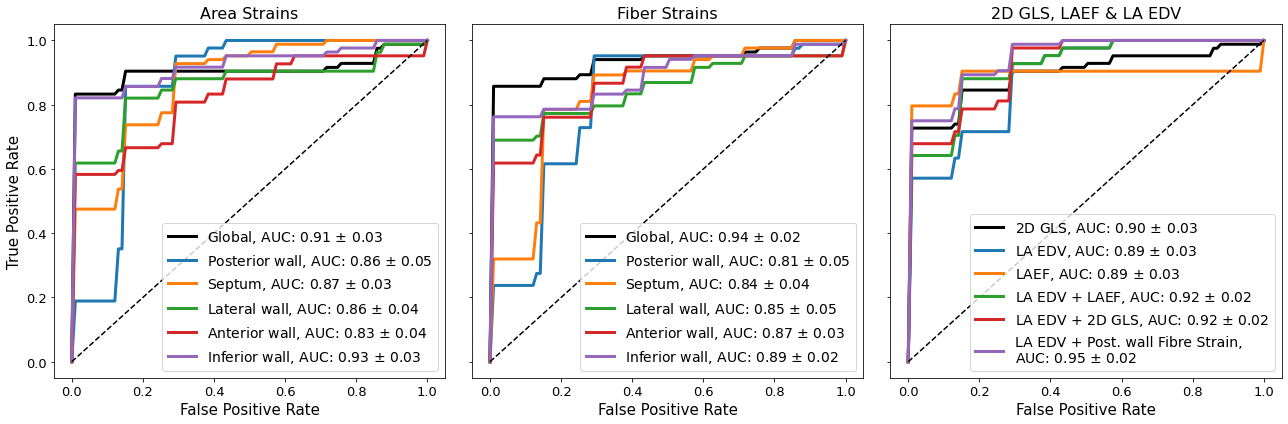

In [107]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3,figsize=(18,6), facecolor='white', sharey=True)

regions_axis=['Global', 'Posterior wall', 'Septum', 'Lateral wall', 'Anterior wall', 'Inferior wall']

ax1.plot(mean_fpr, mean_tpr_a[:, 0], 
         label=f"{regions_axis[0]}, AUC: {np.round(mean_auc_a[0], 2)} $\pm$ {np.round(std_auc_a[0], 2)}", lw=3, 
         color='black')
ax2.plot(mean_fpr, mean_tpr_f1[:, 0], 
         label=f"{regions_axis[0]}, AUC: {np.round(mean_auc_f1[0], 2)} $\pm$ {np.round(std_auc_f1[0], 2)}", lw=3, 
         color='black')    

for i in range(1, len(regions)):
    ax2.plot(mean_fpr, mean_tpr_f1[:, i], 
             label=f"{regions_axis[i]}, AUC: {np.round(mean_auc_f1[i], 2)} $\pm$ {np.round(std_auc_f1[i], 2)}", lw=3)
    
    ax1.plot(mean_fpr, mean_tpr_a[:, i], 
             label=f"{regions_axis[i]}, AUC: {np.round(mean_auc_a[i], 2)} $\pm$ {np.round(std_auc_a[i], 2)}", lw=3)
    
## Fig 3 C

ax3.plot(mean_fpr, mean_tpr_GLS[:], 
         label=f"2D GLS, AUC: {np.round(mean_auc_GLS, 2)}0 $\pm$ {np.round(std_auc_GLS, 2)}", lw=3,
        color='black')

ax3.plot(mean_fpr, mean_tpr_LAvol, 
             label=f"LA EDV, AUC: {np.round(mean_auc_LAvol, 2)} $\pm$ {np.round(std_auc_LAvol, 2)}", lw=3)

ax3.plot(mean_fpr, mean_tpr_LAEF, 
             label=f"LAEF, AUC: {np.round(mean_auc_LAEF, 2)} $\pm$ {np.round(std_auc_LAEF, 2)}", lw=3)

ax3.plot(mean_fpr, mean_tpr_LAvol_LAEF, 
             label=f"LA EDV + LAEF, AUC: {np.round(mean_auc_LAvol_LAEF, 2)} $\pm$ {np.round(std_auc_LAvol_LAEF, 2)}", lw=3)

ax3.plot(mean_fpr, mean_tpr_LAvol_GLS, 
             label=f"LA EDV + 2D GLS, AUC: {np.round(mean_auc_LAvol_GLS, 2)} $\pm$ {np.round(std_auc_LAvol_GLS, 2)}", lw=3)

# ax3.plot(mean_fpr, mean_tpr_LAvol_a[:, 0], 
#              label=f"LA EDV + Global Area Strain,\nAUC: {np.round(mean_auc_LAvol_a[0], 2)} $\pm$ {np.round(std_auc_LAvol_a[0], 2)}", 
#          lw=3)

ax3.plot(mean_fpr, mean_tpr_LAvol_f1[:, 1], 
             label=f"LA EDV + Post. wall Fibre Strain,\nAUC: {np.round(mean_auc_LAvol_f1[1], 2)} $\pm$ {np.round(std_auc_LAvol_f1[1], 2)}", 
         lw=3)

# ax3.plot(mean_fpr, mean_tpr_LAvol_LAEF_f1[:, 1], 
#              label=f"LA EDV + LAEF + Post. Fibre Strain,\nAUC: {np.round(mean_auc_LAvol_LAEF_f1[1], 2)} $\pm$ {np.round(std_auc_LAvol_LAEF_f1[1], 2)}",
#          lw=3)



for i in range(0, len(fig.axes[:])):
    fig.axes[i].plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black')
    fig.axes[i].tick_params(axis='both', labelsize=13)

fig.axes[0].set_ylabel("True Positive Rate", fontsize=15)

for i in range(0, len(fig.axes[:]), 1):
    fig.axes[i].legend(fontsize=14, loc='lower right')
    fig.axes[i].set_xlabel("False Positive Rate", fontsize=15)

ax1.set_title("Area Strains", fontsize=16)
ax2.set_title("Fiber Strains", fontsize=16)
ax3.set_title("2D GLS, LAEF & LA EDV", fontsize=16)
plt.tight_layout()

# plt.savefig("/home/csi20/Dropbox/phd/Documents/P1/Frontiers/roc_curves_v2.png", dpi=200, bbox_inches="tight")

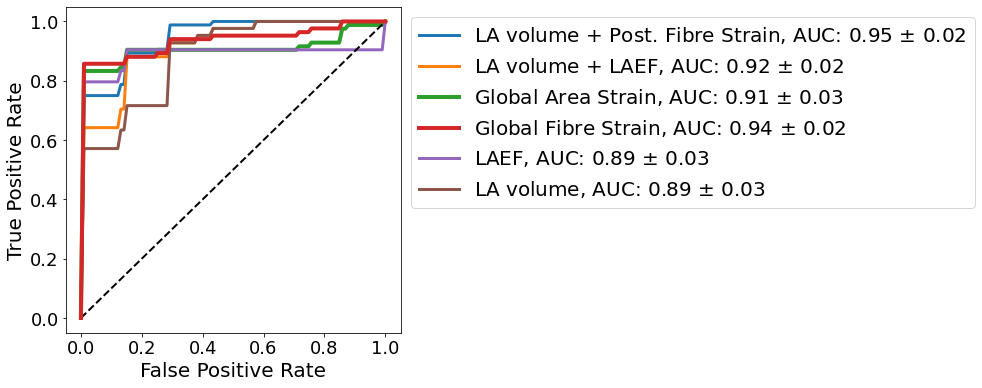

In [87]:
## Graphical Abstract

fig, ((ax1)) = plt.subplots(1,1,figsize=(6,6), facecolor='white', sharey=True)

regions_axis=['Global', 'Posterior wall', 'Septum', 'Lateral wall', 'Anterior wall', 'Inferior wall']
    

ax1.plot(mean_fpr, mean_tpr_LAvol_f1[:, 1], 
             label=f"LA volume + Post. Fibre Strain, AUC: {np.round(mean_auc_LAvol_f1[1], 2)} $\pm$ {np.round(std_auc_LAvol_f1[1], 2)}", 
         lw=3)

ax1.plot(mean_fpr, mean_tpr_LAvol_LAEF, 
             label=f"LA volume + LAEF, AUC: {np.round(mean_auc_LAvol_LAEF, 2)} $\pm$ {np.round(std_auc_LAvol_LAEF, 2)}", lw=3)

ax1.plot(mean_fpr, mean_tpr_a[:, 0], label=f'Global Area Strain, AUC: {np.round(mean_auc_a[0], 2)} $\pm$ {np.round(std_auc_a[0], 2)}', lw=4)
ax1.plot(mean_fpr, mean_tpr_f1[:, 0], zorder=5, label=f'Global Fibre Strain, AUC: {np.round(mean_auc_f1[0], 2)} $\pm$ {np.round(std_auc_f1[0], 2)}', lw=4)


ax1.plot(mean_fpr, mean_tpr_LAEF, 
             label=f"LAEF, AUC: {np.round(mean_auc_LAEF, 2)} $\pm$ {np.round(std_auc_LAEF, 2)}", lw=3)

ax1.plot(mean_fpr, mean_tpr_LAvol, 
             label=f"LA volume, AUC: {np.round(mean_auc_LAvol, 2)} $\pm$ {np.round(std_auc_LAvol, 2)}", lw=3)

for i in range(0, len(fig.axes[:])):
    fig.axes[i].plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black', lw=2)
    fig.axes[i].tick_params(axis='both', labelsize=18)

fig.axes[0].set_ylabel("True Positive Rate", fontsize=20)

for i in range(0, len(fig.axes[:]), 1):
    fig.axes[i].legend(fontsize=20, bbox_to_anchor=(1.0, 1.0))
    fig.axes[i].set_xlabel("False Positive Rate", fontsize=20)

# plt.tight_layout()

# plt.savefig("/home/csi20local/Dropbox/phd/Documents/P1/EHJ_CI/graph_abs_roc_v4.png", dpi=200, bbox_inches="tight")

In [88]:
thresholds_f1.shape

(8,)

## Exploration: Using a combination of features for binary classification

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [38]:
y_lavol

array([123.11901521,  58.76441069,  43.06444671,  64.17869282,
       135.00148667, 129.49272678, 132.01009107, 117.87286138,
       142.9745158 ,  59.74418503,  69.18637305,  79.00631606,
        77.26941488, 127.16264877,  74.21955156,  91.56072922,
        82.73727646, 131.35111729,  50.14238281, 170.50532264,
        57.6703252 , 113.0252409 , 179.53981706, 171.25664156,
       138.66772989,  92.03521881, 139.36320305, 223.17540436,
       202.81816363, 207.93637002])

In [40]:
y_area.shape

(30, 6)

In [41]:
y_fibers.shape

(30, 6, 2)

In [46]:
## LA volume (structural measure of LA myopathy) + all functional params
## Do CT strains have larger effect than LAEF for binary classification of AF when combined with LA vol?

## Normalise features
y_lavol_scaled = scaler.fit_transform(y_lavol[:, np.newaxis])
y_laef_scaled = scaler.fit_transform(y_laef[:, np.newaxis])

## laef
y_pred_overall = y_laef_scaled - y_lavol_scaled
ans = metrics.roc_auc_score(y_true[:, 0], -y_pred_overall)
print(f"LAEF + LA volume AUC: \t\t\t", 1-ans)

print("\n")

## all regional fibre strains
for i in range(0, y_fibers.shape[1]):
    
    ## First normalise strain
    y_fibers_scaled = scaler.fit_transform(y_fibers[:, i, 0][:, np.newaxis])

    ## Combine metrics
    y_pred_overall = y_fibers_scaled - y_lavol_scaled
    
    ans = metrics.roc_auc_score(y_true[:, 0], -y_pred_overall)
    print(f"{regions[i]} fibre strain + LA volume AUC: \t", 1-ans)

print("\n")
    
## all regional area strains
for i in range(0, y_fibers.shape[1]):
    
    ## First normalise strain
    y_area_scaled = scaler.fit_transform(y_area[:, i][:, np.newaxis])

    ## Combine metrics
    y_pred_overall = y_area_scaled - y_lavol_scaled
    
    ans = metrics.roc_auc_score(y_true[:, 0], -y_pred_overall)
    print(f"{regions[i]} area strain + LA volume AUC: \t", 1-ans)

LAEF + LA volume AUC: 			 0.9153439153439153


global fibre strain + LA volume AUC: 	 0.9365079365079365
roof fibre strain + LA volume AUC: 	 0.9470899470899471
sept fibre strain + LA volume AUC: 	 0.9312169312169312
lat fibre strain + LA volume AUC: 	 0.9259259259259259
ant fibre strain + LA volume AUC: 	 0.9153439153439153
post fibre strain + LA volume AUC: 	 0.9206349206349207


global area strain + LA volume AUC: 	 0.9312169312169312
roof area strain + LA volume AUC: 	 0.8941798941798942
sept area strain + LA volume AUC: 	 0.9206349206349207
lat area strain + LA volume AUC: 	 0.8994708994708995
ant area strain + LA volume AUC: 	 0.9047619047619048
post area strain + LA volume AUC: 	 0.9365079365079365


In [51]:
## Investigating if adding fibre strain to LAEF and LAEDV imrpoves AUC

## LA volume (structural measure of LA myopathy) + all functional params

## Normalise features
y_lavol_scaled = scaler.fit_transform(y_lavol[:, np.newaxis])
y_laef_scaled = scaler.fit_transform(y_laef[:, np.newaxis])

## laef
y_pred_overall = y_laef_scaled - y_lavol_scaled
ans = metrics.roc_auc_score(y_true[:, 0], -y_pred_overall)
print(f"LAEF + LA volume AUC: \t\t\t", 1-ans)


print("\n")

## all regional fibre strains
for i in range(0, len(regions)):
    
    ## First normalise strain
    y_fibers_scaled = scaler.fit_transform(y_fibers[:, i, 0][:, np.newaxis])

    ## Combine metrics
    y_pred_overall = y_fibers_scaled - y_lavol_scaled + y_laef_scaled
    
    ans = metrics.roc_auc_score(y_true[:, 0], -y_pred_overall)
    print(f"{regions[i]} fibre strain + LA volume + LAEF: \t", 1-ans)

print("\n")
    
## all regional area strains
for i in range(0, len(regions)):
    
    ## First normalise strain
    y_area_scaled = scaler.fit_transform(y_area[:, i][:, np.newaxis])

    ## Combine metrics
    y_pred_overall = y_area_scaled - y_lavol_scaled + y_laef_scaled
    
    ans = metrics.roc_auc_score(y_true[:, 0], -y_pred_overall)
    print(f"{regions[i]} area strain + LA volume AUC + LAEF: \t", 1-ans)

LAEF + LA volume AUC: 			 0.9153439153439153


global fibre strain + LA volume + LAEF: 	 0.9417989417989417
roof fibre strain + LA volume + LAEF: 	 0.9576719576719577
sept fibre strain + LA volume + LAEF: 	 0.9470899470899471
lat fibre strain + LA volume + LAEF: 	 0.9365079365079365
ant fibre strain + LA volume + LAEF: 	 0.9259259259259259
post fibre strain + LA volume + LAEF: 	 0.9470899470899471


global area strain + LA volume AUC + LAEF: 	 0.9259259259259259
roof area strain + LA volume AUC + LAEF: 	 0.9259259259259259
sept area strain + LA volume AUC + LAEF: 	 0.9365079365079365
lat area strain + LA volume AUC + LAEF: 	 0.9312169312169312
ant area strain + LA volume AUC + LAEF: 	 0.9206349206349206
post area strain + LA volume AUC + LAEF: 	 0.9365079365079365


In [92]:
y_area.shape

(30, 6)

In [93]:
## Investigating if adding area strain to LAEF and LAEDV imrpoves AUC

Y_norm_2 = (y_lavol - y_lavol.mean())/y_lavol.std()

for i in range(0, y_area.shape[1]):
    Y_norm_1 = (y_area[:, i] - y_area[:, i].mean())/y_area[:, i].std()
    Y_pred_overall = Y_norm_1 - Y_norm_2

    ans = metrics.roc_auc_score(y_true[:, 0], -Y_pred_overall)
    print(f"{regions[i]} area strain + LA volume AUC: \t", 1-ans)
    

global area strain + LA volume AUC: 	 0.9312169312169312
roof area strain + LA volume AUC: 	 0.8941798941798942
sept area strain + LA volume AUC: 	 0.9206349206349207
lat area strain + LA volume AUC: 	 0.8994708994708995
ant area strain + LA volume AUC: 	 0.9047619047619048
post area strain + LA volume AUC: 	 0.9365079365079365


In [91]:
## Investigating if adding fibre strain to LAEF and LAEDV imrpoves AUC

Y_norm_2 = (y_lavol - y_lavol.mean())/y_lavol.std()
Y_norm_1 = (y_laef - y_laef.mean())/y_laef.std()

Y_pred_overall = Y_norm_1 - Y_norm_2

ans = metrics.roc_auc_score(y_true[:, 0], -Y_pred_overall)
print(f"LAEF + LA volume AUC: \t", 1-ans)
    

LAEF + LA volume AUC: 	 0.9153439153439153


In [80]:
y_fibers.shape

(30, 6, 2)

In [81]:
## Sanity check

ans = metrics.roc_auc_score(y_true[:, 0], y_fibers[:, 0, 0])
ans

0.9365079365079365